<a href="https://colab.research.google.com/github/m1d0e1/My-Portfolio/blob/master/InternshipFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install tableone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from tableone import TableOne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.3 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("cyprus_1346_participants.csv")
pd.Series(df.columns)

,0
0,DNA number
1,Sex
2,Age
3,Family status
4,Education level
5,Smoking
6,Smoking Times
7,Ever was diagnosed with a medical condition
8,Drug use
9,Family cancer


In [ ]:
#Demographics
demographics = df.iloc[:,1:20]
# Summary Statistics for Continuous Variables
continues_summary = demographics.select_dtypes(['float64','int']).drop(columns=['Blood pressure - Systolic mmHg', 'Blood pressure - Diastolic mmHg']).describe()
print(continues_summary)
pd.Series(demographics.columns)

               Age  Height (cm)  Weight (Kg)          BMI  Waist size (cm)
count  1346.000000  1331.000000  1328.000000  1328.000000       953.000000
mean     50.359584   167.367393    74.227410    26.351130        92.018888
std      13.917761     9.323241    17.288834     5.173808        15.680692
min      19.000000   134.000000    38.000000    16.300000        48.000000
25%      40.000000   160.000000    60.000000    22.700000        81.000000
50%      50.000000   166.000000    72.000000    25.700000        91.000000
75%      61.000000   174.000000    85.000000    29.100000       101.000000
max      87.000000   198.000000   163.000000    61.300000       168.000000


,0
0,Sex
1,Age
2,Family status
3,Education level
4,Smoking
5,Smoking Times
6,Ever was diagnosed with a medical condition
7,Drug use
8,Family cancer
9,High blood pressure


In [ ]:
# Frequency Counts for Categorical Variables with Numbers and Percentages
categorical_columns = ["Sex", "Family status", "Education level", "Smoking", "Smoking Times",
                       "Ever was diagnosed with a medical condition", "Drug use", "Family cancer", "High blood pressure"]

for column in categorical_columns:
    print(f"\nFrequency Counts for '{column}':")
    frequency_counts = demographics[column].value_counts().sort_index()
    total_count = frequency_counts.sum()

    for category, count in frequency_counts.items():
        percentage = (count / total_count) * 100
        print(f"{category}: {count} ({percentage:.1f}%)")


Frequency Counts for 'Sex':
Female: 768 (57.1%)
Male: 578 (42.9%)

Frequency Counts for 'Family status':
Civil partnership agreement: 1 (0.1%)
Divorced: 62 (4.6%)
Married: 978 (72.7%)
Single: 283 (21.0%)
Widowed: 22 (1.6%)

Frequency Counts for 'Education level':
College: 163 (12.1%)
Elementary: 50 (3.7%)
High School: 50 (3.7%)
High school/Technical school: 278 (20.7%)
I did not complete primary school: 4 (0.3%)
PhD: 50 (3.7%)
Postgraduate: 232 (17.2%)
Tertiary university degree (bachelor's degree): 460 (34.2%)
Tertiary vocational school e.g. AXIK, ATI: 59 (4.4%)

Frequency Counts for 'Smoking':
In the past (>1 year off): 142 (10.6%)
No: 934 (69.5%)
Yes: 268 (19.9%)

Frequency Counts for 'Smoking Times':
2-3 times a week: 154 (11.5%)
2-4 times monthly: 203 (15.1%)
4 or more times a week: 58 (4.3%)
Monthly or less: 445 (33.1%)
Never: 483 (36.0%)

Frequency Counts for 'Ever was diagnosed with a medical condition':
No: 589 (43.9%)
Yes: 753 (56.1%)

Frequency Counts for 'Drug use':
No: 60

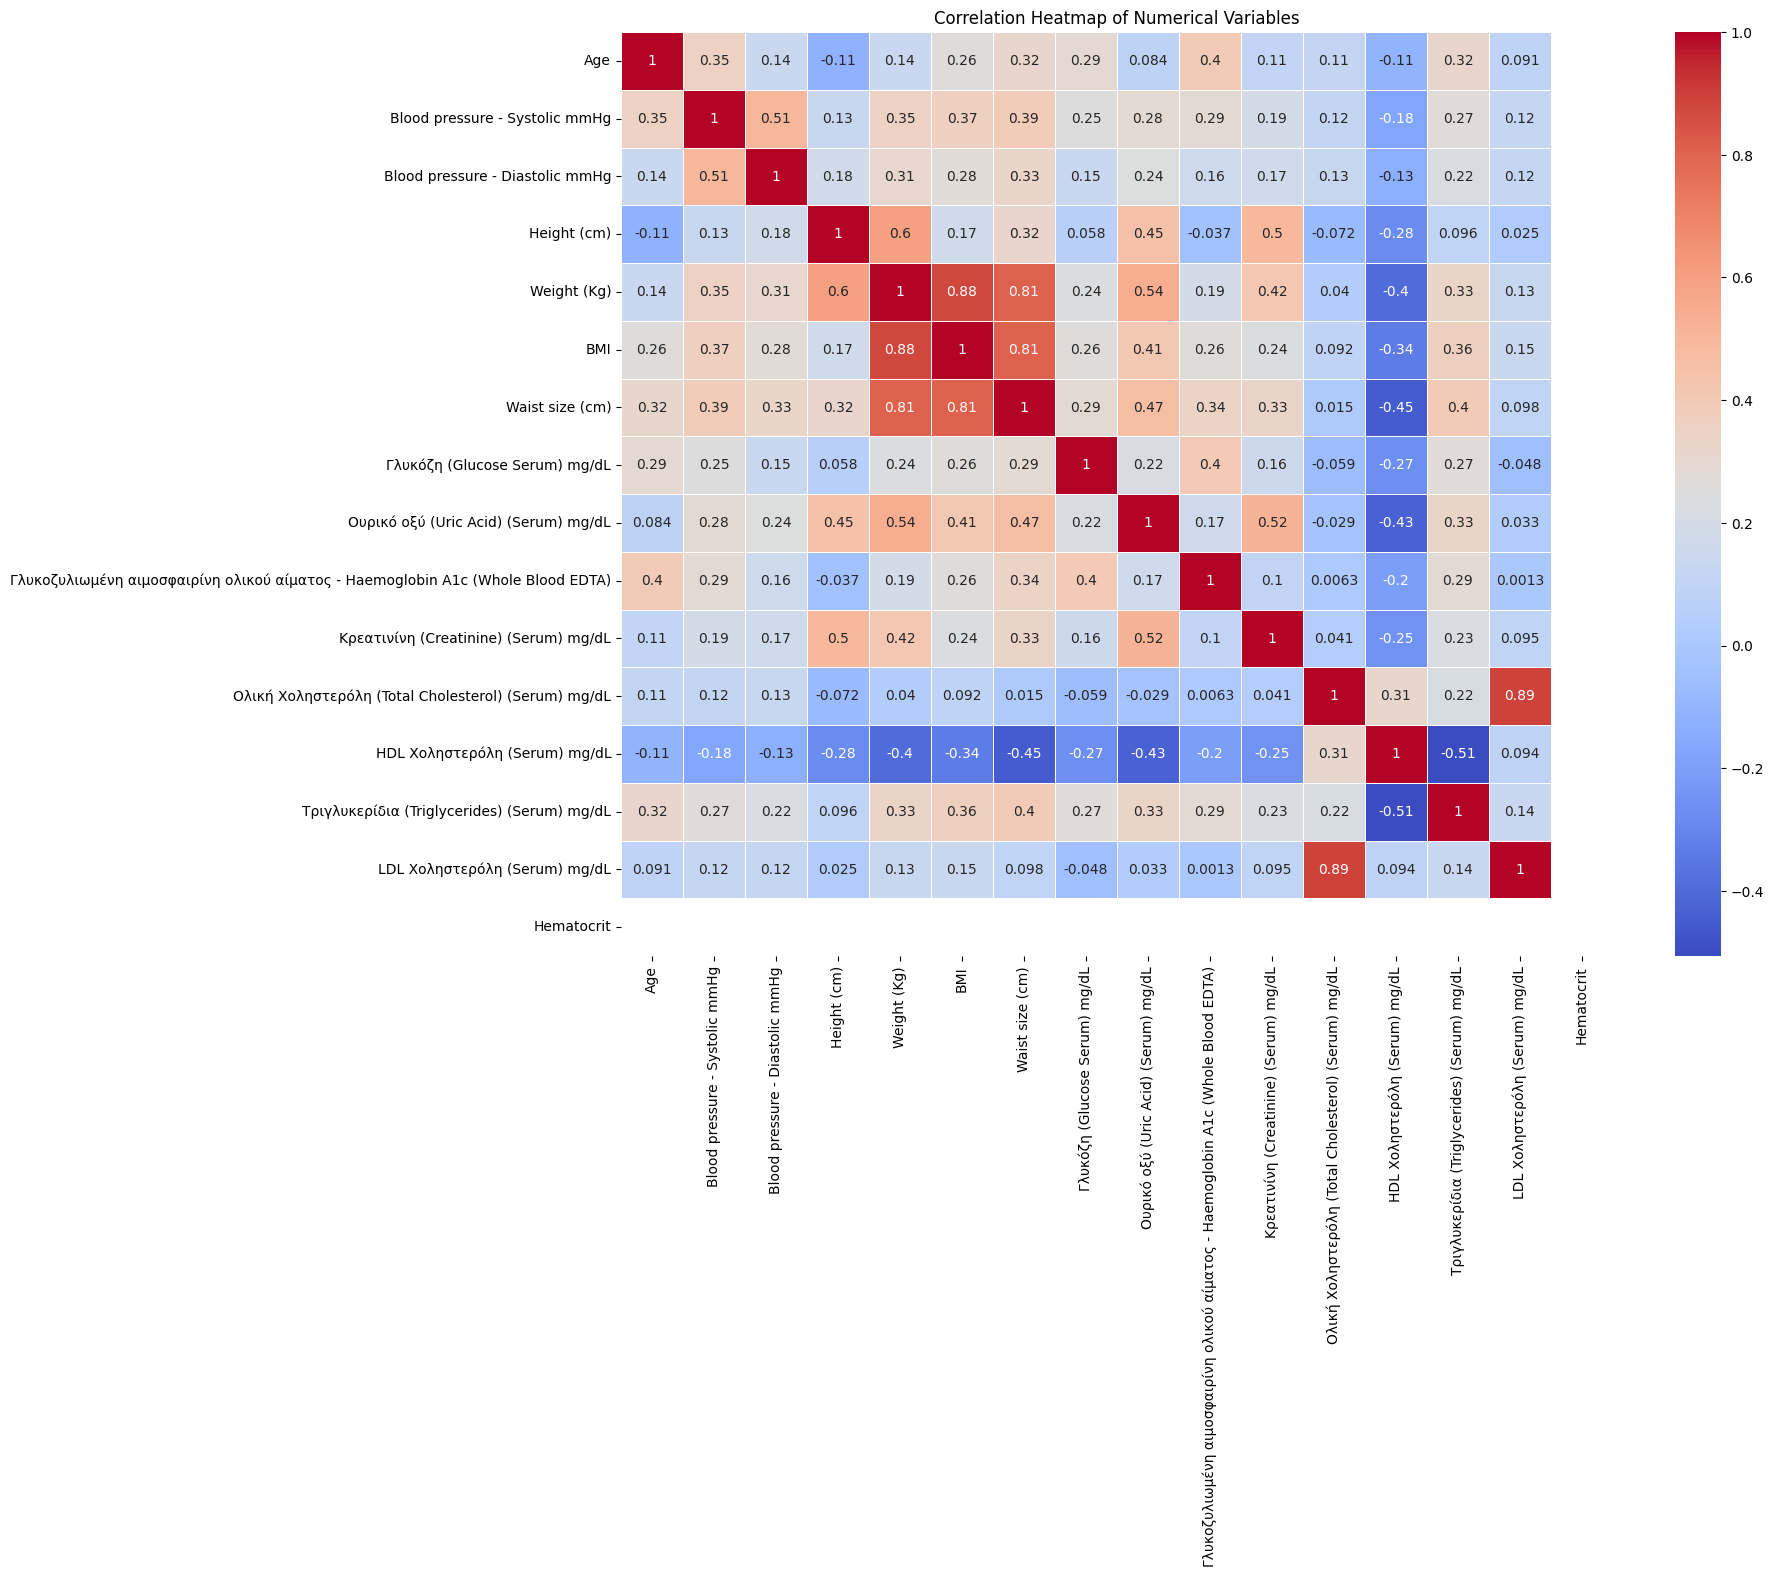

In [ ]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr(method = 'spearman')

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [ ]:
#Categorizing Age
age_bins = [20, 40, 60, 80, 100]
demographics['Age Group'] = pd.cut(demographics['Age'], bins=age_bins)
demographics.groupby("Age Group").size()

<ipython-input-7-ca7c80035779>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographics.groupby("Age Group").size()


,0
Age Group,
"(20, 40]",334
"(40, 60]",637
"(60, 80]",357
"(80, 100]",14


In [ ]:
# Cross-tabulation
crosstab_counts = pd.crosstab(demographics['Sex'], demographics['Smoking Times'])

# Calculate the percentages
crosstab_percent = crosstab_counts.div(crosstab_counts.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a formatted string
crosstab_combined = crosstab_counts.astype(str) + " (" + crosstab_percent.round(1).astype(str) + "%)"

# Display the combined crosstab
print(crosstab_combined)

#pd.Series(demographics.columns)


Smoking Times 2-3 times a week 2-4 times monthly 4 or more times a week  \
Sex                                                                       
Female               55 (7.2%)       103 (13.4%)              20 (2.6%)   
Male                99 (17.2%)       100 (17.4%)              38 (6.6%)   

Smoking Times Monthly or less        Never  
Sex                                         
Female            243 (31.6%)  347 (45.2%)  
Male              202 (35.1%)  136 (23.7%)  


In [ ]:
# TableOne & p-value of Demographics grouped by Sex
columns = [
    'Age', 'Family status', 'Smoking', 'Smoking Times',
    'Education level', 'Ever was diagnosed with a medical condition',
    'Drug use', 'Family cancer', 'High blood pressure', 'BMI',
    'Height (cm)', 'Weight (Kg)', 'Waist size (cm)'
]

categorical = [
    'Family status', 'Smoking', 'Smoking Times',
    'Education level', 'Ever was diagnosed with a medical condition',
    'Drug use', 'Family cancer', 'High blood pressure'
]

groupby = 'Sex'

# Create Table One
table = TableOne(data=demographics, columns=columns, categorical=categorical, groupby=groupby, pval=True)
#print(demographics.dtypes)

# Print Table One
print(table.tabulate(tablefmt="github"))

|                                                    |                                                | Missing   | Overall     | Female      | Male        | P-Value   |
|----------------------------------------------------|------------------------------------------------|-----------|-------------|-------------|-------------|-----------|
| n                                                  |                                                |           | 1346        | 768         | 578         |           |
| Age, mean (SD)                                     |                                                | 0         | 50.4 (13.9) | 49.6 (13.6) | 51.4 (14.3) | 0.020     |
| Family status, n (%)                               | Civil partnership agreement                    |           | 1 (0.1)     | 1 (0.1)     |             | 0.017     |
|                                                    | Divorced                                       |           | 62 (4.6)    | 44 (5.7)    | 18 (3.

/usr/local/lib/python3.10/dist-packages/tableone/tableone.py:705: UserWarning: Order variable not found: Age Group
  warnings.warn("Order variable not found: {}".format(k))


In [ ]:
# TableOne & p-value of Demographics grouped by Sex
demographics['Age Group'] = demographics['Age Group'].astype('object')

columns = [
    'Age', 'Family status', 'Smoking', 'Smoking Times',
    'Education level', 'Ever was diagnosed with a medical condition',
    'Drug use', 'Family cancer', 'High blood pressure', 'BMI',
    'Height (cm)', 'Weight (Kg)', 'Waist size (cm)'
]

categorical = [
    'Family status', 'Smoking', 'Smoking Times',
    'Education level', 'Ever was diagnosed with a medical condition',
    'Drug use', 'Family cancer', 'High blood pressure'
]

groupby = 'Age Group'

# Create Table One
table = TableOne(data=demographics, columns=columns, categorical=categorical, groupby=groupby, pval=True)
#print(demographics.dtypes)

# Print Table One
print(table.tabulate(tablefmt="github"))

|                                                    |                                                | Missing   | Overall     | (20, 40]    | (40, 60]    | (60, 80]    | (80, 100]    | P-Value   |
|----------------------------------------------------|------------------------------------------------|-----------|-------------|-------------|-------------|-------------|--------------|-----------|
| n                                                  |                                                |           | 1346        | 334         | 637         | 357         | 14           |           |
| Age, mean (SD)                                     |                                                | 0         | 50.4 (13.9) | 32.7 (5.2)  | 49.8 (5.7)  | 67.0 (4.9)  | 83.3 (1.7)   | <0.001    |
| Family status, n (%)                               | Civil partnership agreement                    |           | 1 (0.1)     | 1 (0.3)     |             |             |              | <0.001    |
|    

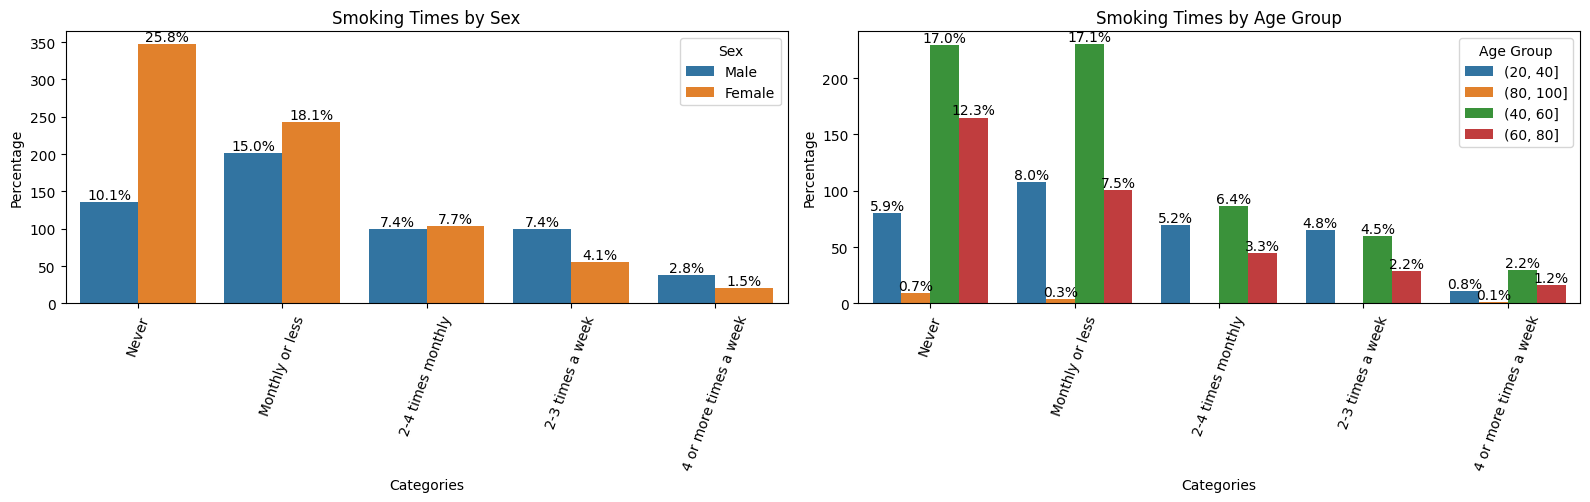

In [ ]:
def plot_countplot_with_percentage(df, x, hue, ax, title, order=None):
    # Plot countplot
    sns.countplot(data=df, x=x, hue=hue, ax=ax, order=order)

    # Get the total count for percentage calculation
    total = df[x].count()

    # Annotate bars with percentages
    for container in ax.containers:
        ax.bar_label(container, fmt=lambda x: f'{(x/total)*100:0.1f}%', label_type='edge', fontsize=10)

    ax.set_title(title)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Percentage')

# Create subplots with a larger figure size
plt.figure(figsize=(16, 8))

# First plot: Smoking Times by Sex
plt.subplot(2, 2, 1)
category_order = ['Never', 'Monthly or less', '2-4 times monthly', '2-3 times a week', '4 or more times a week']
plot_countplot_with_percentage(demographics, 'Smoking Times', 'Sex', plt.gca(), 'Smoking Times by Sex', order=category_order)
plt.xticks(rotation=70)

# Second plot: Smoking Times by Age Group
plt.subplot(2, 2, 2)
plot_countplot_with_percentage(demographics, 'Smoking Times', 'Age Group', plt.gca(), 'Smoking Times by Age Group', order=category_order)
plt.xticks(rotation=70)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
demographics.groupby(['Sex', 'Age Group'])[['High blood pressure','Smoking']].value_counts().unstack(fill_value=0)

Smoking                               In the past (>1 year off)   No  None  \
Sex    Age Group High blood pressure                                         
Female (20, 40]  No                                           5  134     0   
                 None                                         0    3     0   
                 Yes                                          2    5     0   
       (40, 60]  No                                          17  253     0   
                 None                                         0    4     0   
                 Yes                                          8   27     0   
       (60, 80]  No                                           8   98     0   
                 None                                         1    2     0   
                 Yes                                          6   57     0   
       (80, 100] No                                           0    4     0   
                 Yes                                          0    1     0   
Male   (20, 40]  No                                           6   76     0   
                 None                                         0    4     0   
                 Yes                                          1    5     0   
       (40, 60]  No                                          26  128     0   
                 None                                         1    4     1   
                 Yes                                          8   39     0   
       (60, 80]  No                                          23   40     0   
                 None                                         1    2     0   
                 Yes                                         25   41     1   
       (80, 100] No                                           3    3     0   
                 Yes                                          1    1     0   

Smoking                               Yes  
Sex    Age Group High blood pressure       
Female (20, 40]  No                    41  
                 None                   2  
                 Yes                    2  
       (40, 60]  No                    46  
                 None                   4  
                 Yes                    8  
       (60, 80]  No                    15  
                 None                   1  
                 Yes                   11  
       (80, 100] No                     0  
                 Yes                    0  
Male   (20, 40]  No                    43  
                 None                   2  
                 Yes                    3  
       (40, 60]  No                    52  
                 None                   0  
                 Yes                   11  
       (60, 80]  No                    12  
                 None                   2  
                 Yes                   11  
       (80, 100] No                     1  
                 Yes                    0

In [ ]:
demographics.groupby(['Sex', 'Age Group'])[['Smoking']].value_counts().unstack(fill_value=0)

Smoking           In the past (>1 year off)   No  None  Yes
Sex    Age Group                                           
Female (20, 40]                           7  142     0   45
       (40, 60]                          25  284     0   58
       (60, 80]                          15  157     0   27
       (80, 100]                          0    5     0    0
Male   (20, 40]                           7   85     0   48
       (40, 60]                          35  171     1   63
       (60, 80]                          49   83     1   25
       (80, 100]                          4    4     0    1

<Axes: xlabel='Age', ylabel='Count'>

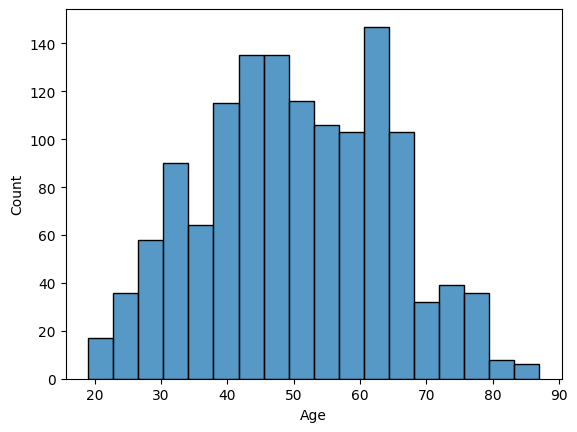

In [ ]:
sns.histplot(demographics, x="Age")

<Axes: xlabel='High blood pressure', ylabel='Age'>

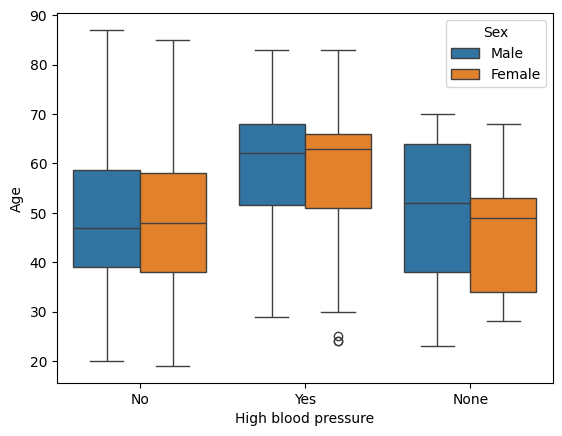

In [ ]:
sns.boxplot(demographics, x="High blood pressure", y="Age", hue = "Sex")

In [ ]:
#Clinical Tests
Clinical = df.iloc[:,13:30]
Clinical = df[['Sex']].join(Clinical)

Clinical['SBP'] = Clinical['Blood pressure - Systolic mmHg'].apply(lambda x: 'Normal' if x <= 120 else 'High')
Clinical['DBP'] = Clinical['Blood pressure - Diastolic mmHg'].apply(lambda x: 'Normal' if x <= 80 else 'High')

# Define the BMI categories
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']

# Add a new column 'BMI Category' to the DataFrame
Clinical['BMI Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

Clinical['Glucose'] = Clinical['Γλυκόζη (Glucose Serum) mg/dL'].apply(lambda x: 'Normal' if x < 100 else 'High')
Clinical = demographics[['Age Group']].join(Clinical)
#Clinical.columns

In [ ]:
# Define columns and groups
columns = ['Blood pressure - Systolic mmHg',
       'Blood pressure - Diastolic mmHg',
       'Γλυκόζη (Glucose Serum) mg/dL', 'Ουρικό οξύ (Uric Acid) (Serum) mg/dL',
       'Γλυκοζυλιωμένη αιμοσφαιρίνη ολικού αίματος - Haemoglobin A1c (Whole Blood EDTA)',
       'Κρεατινίνη (Creatinine) (Serum) mg/dL',
       'Ολική Χοληστερόλη (Total Cholesterol) (Serum) mg/dL',
       'HDL Χοληστερόλη (Serum) mg/dL',
       'Τριγλυκερίδια (Triglycerides) (Serum) mg/dL',
       'LDL Χοληστερόλη (Serum) mg/dL',
]

groupby = 'Sex'

# Create Table One
table = TableOne(data=df, columns=columns, groupby=groupby, pval=True)
# Print Table One
print(table.tabulate(tablefmt="github"))

|                                                                                            |    | Missing   | Overall      | Female       | Male         | P-Value   |
|--------------------------------------------------------------------------------------------|----|-----------|--------------|--------------|--------------|-----------|
| n                                                                                          |    |           | 1346         | 768          | 578          |           |
| Blood pressure - Systolic mmHg, mean (SD)                                                  |    | 118       | 126.3 (14.2) | 123.4 (14.2) | 130.4 (13.3) | <0.001    |
| Blood pressure - Diastolic mmHg, mean (SD)                                                 |    | 119       | 78.0 (10.9)  | 76.0 (10.7)  | 80.8 (10.6)  | <0.001    |
| Γλυκόζη (Glucose Serum) mg/dL, mean (SD)                                                   |    | 54        | 96.4 (22.4)  | 94.0 (21.8)  | 99.5 (22.8)  

In [ ]:
# Define columns and groups
columns = ['Blood pressure - Systolic mmHg',
       'Blood pressure - Diastolic mmHg',
       'Γλυκόζη (Glucose Serum) mg/dL', 'Ουρικό οξύ (Uric Acid) (Serum) mg/dL',
       'Γλυκοζυλιωμένη αιμοσφαιρίνη ολικού αίματος - Haemoglobin A1c (Whole Blood EDTA)',
       'Κρεατινίνη (Creatinine) (Serum) mg/dL',
       'Ολική Χοληστερόλη (Total Cholesterol) (Serum) mg/dL',
       'HDL Χοληστερόλη (Serum) mg/dL',
       'Τριγλυκερίδια (Triglycerides) (Serum) mg/dL',
       'LDL Χοληστερόλη (Serum) mg/dL',
]

groupby = 'Age Group'

# Create Table One
table = TableOne(data=Clinical, columns=columns, groupby=groupby, pval=True)
# Print Table One
print(table.tabulate(tablefmt="github"))

|                                                                                            |    | Missing   | Overall      | (20, 40]     | (40, 60]      | (60, 80]     | (80, 100]    | P-Value   |
|--------------------------------------------------------------------------------------------|----|-----------|--------------|--------------|---------------|--------------|--------------|-----------|
| n                                                                                          |    |           | 1346         | 334          | 637           | 357          | 14           |           |
| Blood pressure - Systolic mmHg, mean (SD)                                                  |    | 118       | 126.3 (14.2) | 120.8 (12.5) | 125.1 (13.2)  | 133.5 (14.5) | 134.3 (15.2) | <0.001    |
| Blood pressure - Diastolic mmHg, mean (SD)                                                 |    | 119       | 78.0 (10.9)  | 75.9 (10.6)  | 78.6 (10.7)   | 79.1 (11.0)  | 78.6 (15.7)  | 0.001     |


/usr/local/lib/python3.10/dist-packages/tableone/tableone.py:705: UserWarning: Order variable not found: BMI Category
  warnings.warn("Order variable not found: {}".format(k))
/usr/local/lib/python3.10/dist-packages/tableone/tableone.py:705: UserWarning: Order variable not found: Triglyceride Category
  warnings.warn("Order variable not found: {}".format(k))
/usr/local/lib/python3.10/dist-packages/tableone/tableone.py:705: UserWarning: Order variable not found: LDL Category
  warnings.warn("Order variable not found: {}".format(k))


In [ ]:
# Define the uric acid bins and labels
bins_male_uric = [0, 4.0, 8.5, float('inf')]
bins_female_uric = [0, 2.7, 7.3, float('inf')]
labels = ['Low', 'Normal', 'High']
labels_hdl = ['Low', 'Normal', 'Ideal']

# Function to categorize uric acid based on sex
def categorize_uric_acid(row):
    if row['Sex'] == 'Male':
        return pd.cut([row['Ουρικό οξύ (Uric Acid) (Serum) mg/dL']], bins=bins_male_uric, labels=labels, right=False)[0]
    else:
        return pd.cut([row['Ουρικό οξύ (Uric Acid) (Serum) mg/dL']], bins=bins_female_uric, labels=labels, right=False)[0]

# Apply the function to each row
Clinical['Uric Acid Category'] = df.apply(categorize_uric_acid, axis=1)

Clinical['GlucoseComulative'] = Clinical['Γλυκοζυλιωμένη αιμοσφαιρίνη ολικού αίματος - Haemoglobin A1c (Whole Blood EDTA)'].apply(lambda x: 'Normal' if x < 5.7 else 'High')

bins_male_creatine = [0,0.74, 1.35, float('inf')]
bins_female_creatine = [0,0.59, 1.04, float('inf')]
def categorize_creatine(row):
    if row['Sex'] == 'Male':
        return pd.cut([row['Κρεατινίνη (Creatinine) (Serum) mg/dL']], bins=bins_male_creatine, labels=labels, right=False)[0]
    else:
        return pd.cut([row['Κρεατινίνη (Creatinine) (Serum) mg/dL']], bins=bins_female_creatine, labels=labels, right=False)[0]

Clinical['Creatine Category'] = df.apply(categorize_creatine, axis=1)

Clinical['TotalChol'] = Clinical['Ολική Χοληστερόλη (Total Cholesterol) (Serum) mg/dL'].apply(lambda x: 'Normal' if x < 240 else 'High')

bins_male_hdl = [0,40,60, float('inf')]
bins_female_hdl = [0,50,60, float('inf')]
def categorize_hdl(row):
    if row['Sex'] == 'Male':
        return pd.cut([row['HDL Χοληστερόλη (Serum) mg/dL']], bins=bins_male_hdl, labels=labels, right=False)[0]
    else:
        return pd.cut([row['HDL Χοληστερόλη (Serum) mg/dL']], bins=bins_female_hdl, labels=labels, right=False)[0]
Clinical['HDL Category'] = df.apply(categorize_hdl, axis=1)


bins_tri = [0,150,200,499,float('inf')]
labels_tri = ['Normal', 'Borderline High', 'High', 'Very High']
Clinical['Triglyceride Category'] = pd.cut(df['Τριγλυκερίδια (Triglycerides) (Serum) mg/dL'], bins=bins_tri, labels=labels_tri, right=False)


bins_ldl = [0,100,130,160,190,float('inf')]
labels_ldl = ['Normal','Near Normal', 'Borderline High', 'High', 'Very High']
Clinical['LDL Category'] = pd.cut(df['LDL Χοληστερόλη (Serum) mg/dL'], bins=bins_ldl, labels=labels_ldl, right=False)

ClinicalCat = Clinical.iloc[:,17:30]
ClinicalCat = df[['Sex']].join(ClinicalCat)
ClinicalCat = demographics[['Age Group']].join(ClinicalCat)
ClinicalCat = ClinicalCat.drop(columns=['Ερυθρά ΑΙμοσφαίρια (Erythrocytes - Red Blood Cells)', 'Λευκά Αιμοσφαίρια (Leucocytes - White Blood Cells) μ/L'])

#print(pd.Series(Clinical.columns))
#ClinicalCat['BMI Category'].unique()

In [ ]:
# Define columns and groups
columns = ['SBP', 'DBP', 'BMI Category', 'Glucose', 'Uric Acid Category',
           'GlucoseComulative', 'Creatine Category','TotalChol',
           'HDL Category', 'Triglyceride Category', 'LDL Category']

categorical = ['SBP', 'DBP', 'BMI Category', 'Glucose', 'Uric Acid Category',
           'GlucoseComulative', 'Creatine Category','TotalChol',
           'HDL Category', 'Triglyceride Category', 'LDL Category']

groupby = 'Sex'

# Create Table One
table = TableOne(data=ClinicalCat, columns=columns, categorical=categorical, groupby=groupby, pval=True)
# Print Table One
print(table.tabulate(tablefmt="github"))

|                              |                 | Missing   | Overall     | Female     | Male       | P-Value   |
|------------------------------|-----------------|-----------|-------------|------------|------------|-----------|
| n                            |                 |           | 1346        | 768        | 578        |           |
| SBP, n (%)                   | High            |           | 888 (66.0)  | 443 (57.7) | 445 (77.0) | <0.001    |
|                              | Normal          |           | 458 (34.0)  | 325 (42.3) | 133 (23.0) |           |
| DBP, n (%)                   | High            |           | 591 (43.9)  | 280 (36.5) | 311 (53.8) | <0.001    |
|                              | Normal          |           | 755 (56.1)  | 488 (63.5) | 267 (46.2) |           |
| BMI Category, n (%)          | Underweight     |           | 33 (2.5)    | 27 (3.5)   | 6 (1.0)    | <0.001    |
|                              | Healthy Weight  |           | 524 (38.9)  | 376

In [ ]:
# Define columns and groups
columns = ['SBP', 'DBP', 'BMI Category', 'Glucose', 'Uric Acid Category',
           'GlucoseComulative', 'Creatine Category','TotalChol',
           'HDL Category', 'Triglyceride Category', 'LDL Category']

categorical = ['SBP', 'DBP', 'BMI Category', 'Glucose', 'Uric Acid Category',
           'GlucoseComulative', 'Creatine Category','TotalChol',
           'HDL Category', 'Triglyceride Category', 'LDL Category']

groupby = 'Age Group'

# Create Table One
table = TableOne(data=ClinicalCat, columns=columns, categorical=categorical, groupby=groupby, pval=True)

# Print Table One
print(table.tabulate(tablefmt="github"))

|                              |                 | Missing   | Overall     | (20, 40]   | (40, 60]   | (60, 80]   | (80, 100]   | P-Value   |
|------------------------------|-----------------|-----------|-------------|------------|------------|------------|-------------|-----------|
| n                            |                 |           | 1346        | 334        | 637        | 357        | 14          |           |
| SBP, n (%)                   | High            |           | 888 (66.0)  | 173 (51.8) | 408 (64.1) | 295 (82.6) | 10 (71.4)   | <0.001    |
|                              | Normal          |           | 458 (34.0)  | 161 (48.2) | 229 (35.9) | 62 (17.4)  | 4 (28.6)    |           |
| DBP, n (%)                   | High            |           | 591 (43.9)  | 110 (32.9) | 300 (47.1) | 177 (49.6) | 4 (28.6)    | <0.001    |
|                              | Normal          |           | 755 (56.1)  | 224 (67.1) | 337 (52.9) | 180 (50.4) | 10 (71.4)   |           |
| BMI 

<ipython-input-22-ce4fce265c93>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([x, hue]).size().unstack(fill_value=0)
<ipython-input-22-ce4fce265c93>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([x, hue]).size().unstack(fill_value=0)
<ipython-input-22-ce4fce265c93>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([x, hue]).size().unstack(fill_value=0)


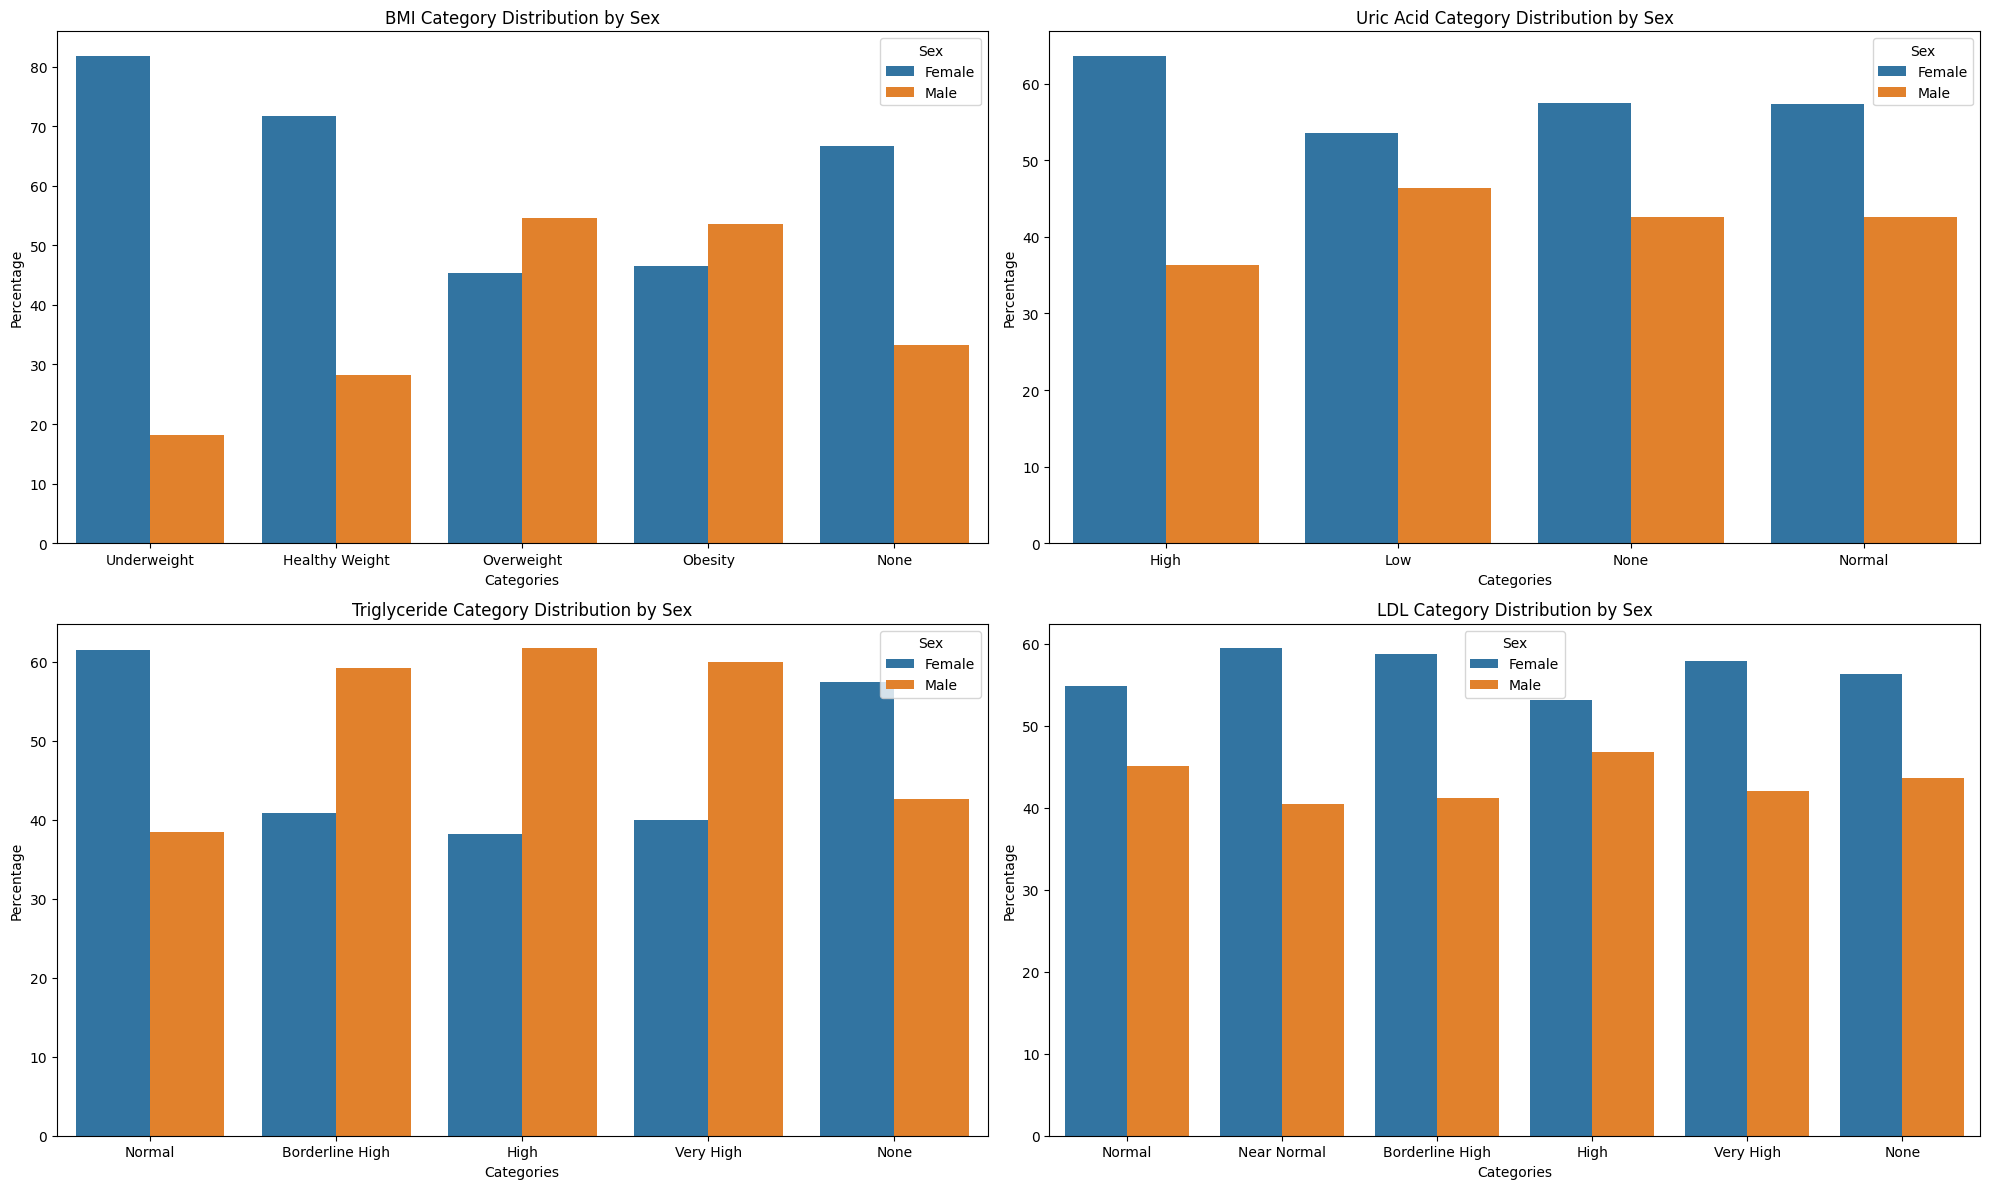

In [ ]:
# Create subplots with a larger figure size
plt.figure(figsize=(20, 12))  # Increased size

# Function to plot count plots with percentages
def plot_count_percentage(df, x, hue, ax, title):
    # Calculate counts and percentages
    counts = df.groupby([x, hue]).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Plot the count plot
    sns.barplot(data=percentages.reset_index().melt(id_vars=x, value_vars=percentages.columns, var_name=hue, value_name='Percentage'),
                x=x, y='Percentage', hue=hue, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Percentage')

# First plot: BMI Category Distribution by Sex
plt.subplot(2, 2, 1)
plot_count_percentage(ClinicalCat, 'BMI Category', 'Sex', plt.gca(), 'BMI Category Distribution by Sex')

# Second plot: Uric Acid Category Distribution by Sex
plt.subplot(2, 2, 2)
plot_count_percentage(ClinicalCat, 'Uric Acid Category', 'Sex', plt.gca(), 'Uric Acid Category Distribution by Sex')

# Third plot: Triglyceride Category Distribution by Sex
plt.subplot(2, 2, 3)
plot_count_percentage(ClinicalCat, 'Triglyceride Category', 'Sex', plt.gca(), 'Triglyceride Category Distribution by Sex')

# Fourth plot: LDL Category Distribution by Sex
plt.subplot(2, 2, 4)
plot_count_percentage(ClinicalCat, 'LDL Category', 'Sex', plt.gca(), 'LDL Category Distribution by Sex')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#print(ClinicalCat.groupby(["Age Group", "Sex"])[["GlucoseComulative","Glucose"]].value_counts().unstack())
ClinicalCat.groupby(["Age Group", "Sex"])[["LDL Category", "TotalChol"]].value_counts().unstack()

TotalChol                         High  Normal
Age Group Sex    LDL Category                 
(20, 40]  Female Normal              2      85
                 Near Normal         1      64
                 Borderline High     6      18
                 High                9       1
                 Very High           0       1
                 None                7       0
          Male   Normal              0      53
                 Near Normal         0      38
                 Borderline High     5      23
                 High                8       2
                 Very High           5       0
                 None                6       0
(40, 60]  Female Normal              2     122
                 Near Normal         2     120
                 Borderline High    10      56
                 High               25       6
                 Very High          11       0
                 None               13       0
          Male   Normal              1      80
                 Near Normal         0      88
                 Borderline High     5      44
                 High               27       4
                 Very High           8       0
                 None               13       0
(60, 80]  Female Normal              0      40
                 Near Normal         1      62
                 Borderline High    18      39
                 High               17       1
                 Very High          10       0
                 None               11       0
          Male   Normal              0      72
                 Near Normal         0      42
                 Borderline High     3      22
                 High                9       2
                 Very High           3       0
                 None                5       0
(80, 100] Female Normal              0       2
                 Near Normal         0       3
                 Borderline High     0       0
                 High                0       0
                 Very High           0       0
                 None                0       0
          Male   Normal              0       4
                 Near Normal         0       4
                 Borderline High     0       1
                 High                0       0
                 Very High           0       0
                 None                0       0

Text(0.5, 1.0, 'Creatine by Age Group & Sex')

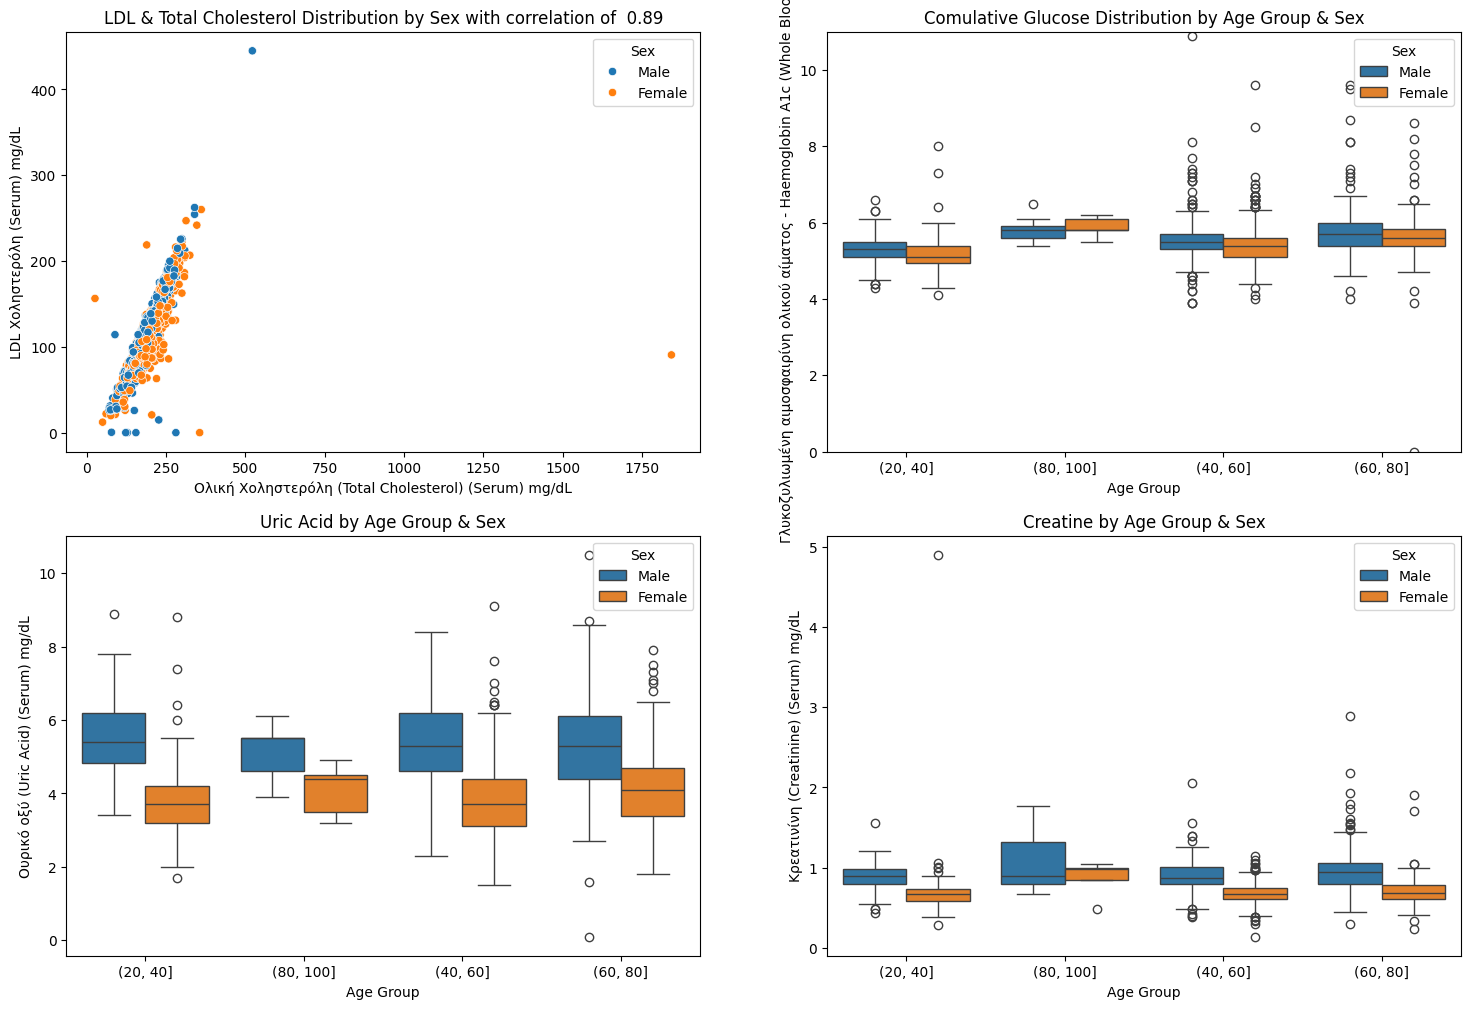

In [ ]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
correlation_ldl = Clinical["Ολική Χοληστερόλη (Total Cholesterol) (Serum) mg/dL"].corr(Clinical["LDL Χοληστερόλη (Serum) mg/dL"], method = 'spearman')
sns.scatterplot(Clinical, x="Ολική Χοληστερόλη (Total Cholesterol) (Serum) mg/dL", y= "LDL Χοληστερόλη (Serum) mg/dL", hue = "Sex")
plt.title(f'LDL & Total Cholesterol Distribution by Sex with correlation of {correlation_ldl: .2f}')

plt.subplot(2, 2, 2)
sns.boxplot(Clinical, x = "Age Group", y = "Γλυκοζυλιωμένη αιμοσφαιρίνη ολικού αίματος - Haemoglobin A1c (Whole Blood EDTA)", hue = "Sex").set_ylim(0,11)
plt.title('Comulative Glucose Distribution by Age Group & Sex')

plt.subplot(2, 2, 3)
sns.boxplot(Clinical, x = "Age Group", y = "Ουρικό οξύ (Uric Acid) (Serum) mg/dL", hue = "Sex")
plt.title('Uric Acid by Age Group & Sex')

plt.subplot(2, 2, 4)
sns.boxplot(Clinical, x = "Age Group", y = "Κρεατινίνη (Creatinine) (Serum) mg/dL", hue = "Sex")
plt.title('Creatine by Age Group & Sex')

Text(0.5, 1.0, 'LDL & Total Cholesterol Distribution by Sex with a correlation of 0.89')

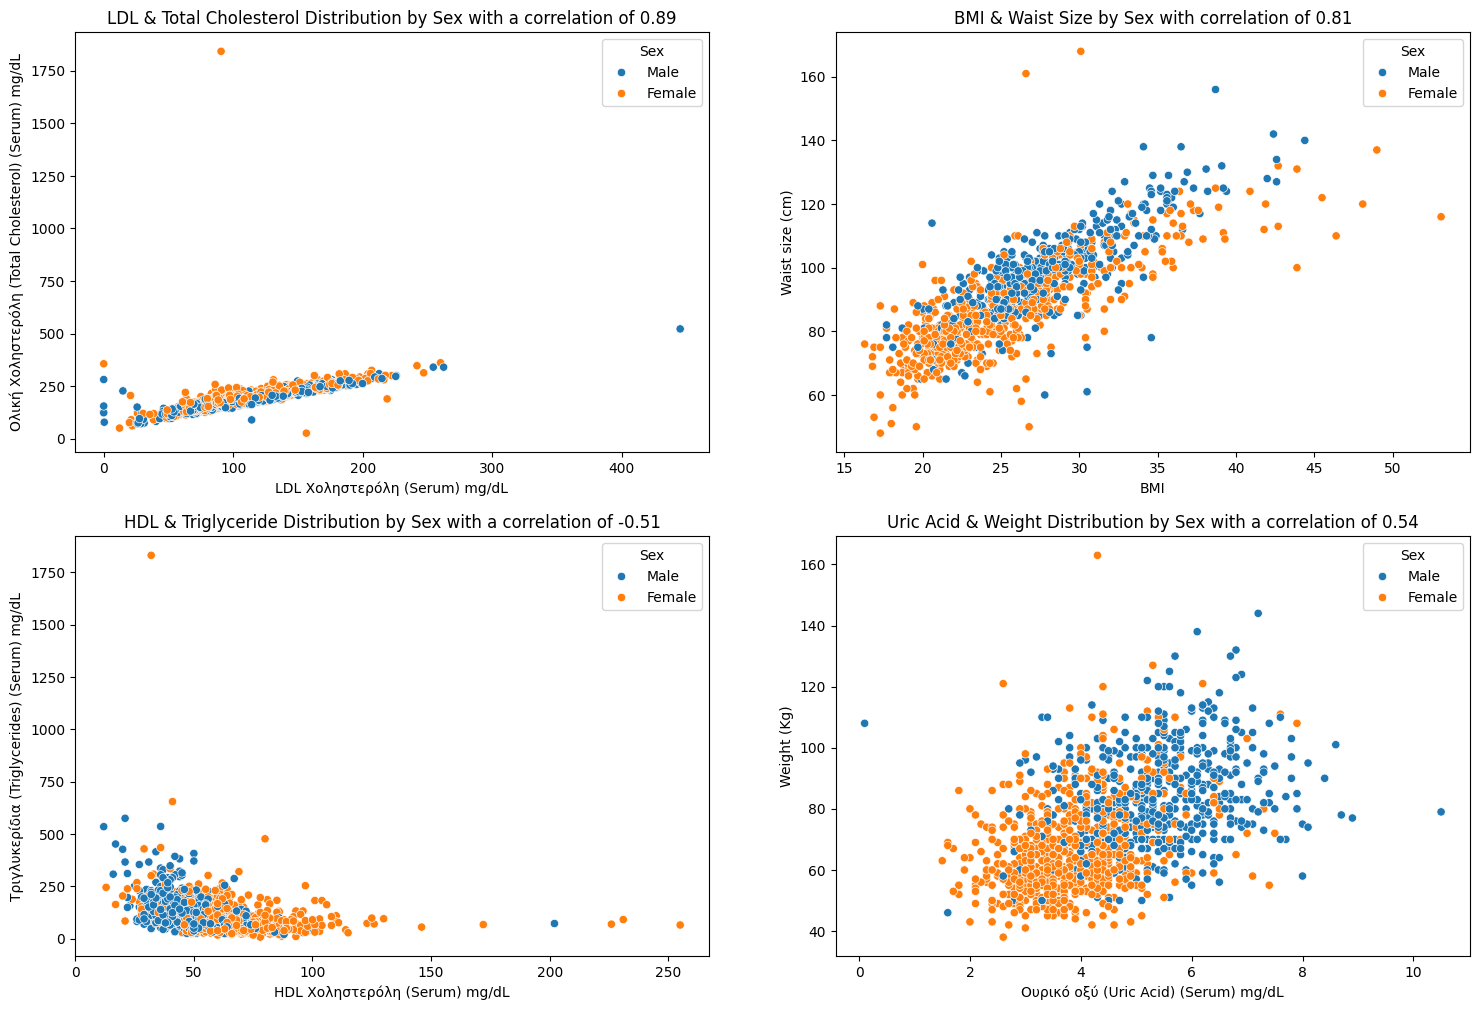

In [ ]:
correlation_waist = Clinical['BMI'].corr(Clinical['Waist size (cm)'], method = 'spearman')
correlation_glucose = Clinical['HDL Χοληστερόλη (Serum) mg/dL'].corr(Clinical['Τριγλυκερίδια (Triglycerides) (Serum) mg/dL'], method = 'spearman')
correlation_creatine = Clinical['Ουρικό οξύ (Uric Acid) (Serum) mg/dL'].corr(Clinical['Weight (Kg)'], method = 'spearman')
correlation_chol = Clinical['LDL Χοληστερόλη (Serum) mg/dL'].corr(Clinical["Ολική Χοληστερόλη (Total Cholesterol) (Serum) mg/dL"], method = 'spearman')

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 2)
sns.scatterplot(Clinical, x="BMI", y= "Waist size (cm)", hue = "Sex")
plt.title(f'BMI & Waist Size by Sex with correlation of {correlation_waist:.2f}')

plt.subplot(2, 2, 3)
sns.scatterplot(Clinical, x="HDL Χοληστερόλη (Serum) mg/dL", y= "Τριγλυκερίδια (Triglycerides) (Serum) mg/dL", hue = "Sex")
plt.title(f'HDL & Triglyceride Distribution by Sex with a correlation of {correlation_glucose:.2f}')

plt.subplot(2, 2, 4)
sns.scatterplot(Clinical, x="Ουρικό οξύ (Uric Acid) (Serum) mg/dL", y= "Weight (Kg)", hue = "Sex")
plt.title(f'Uric Acid & Weight Distribution by Sex with a correlation of {correlation_creatine:.2f}')

plt.subplot(2, 2, 1)
sns.scatterplot(Clinical, x='LDL Χοληστερόλη (Serum) mg/dL', y= "Ολική Χοληστερόλη (Total Cholesterol) (Serum) mg/dL", hue = "Sex")
plt.title(f'LDL & Total Cholesterol Distribution by Sex with a correlation of {correlation_chol:.2f}')

<ipython-input-26-622d634e051c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = data.groupby([x, hue]).size().unstack()
<ipython-input-26-622d634e051c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = data.groupby([x, hue]).size().unstack()
<ipython-input-26-622d634e051c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = data.groupby([x, hue]).size().unstack()


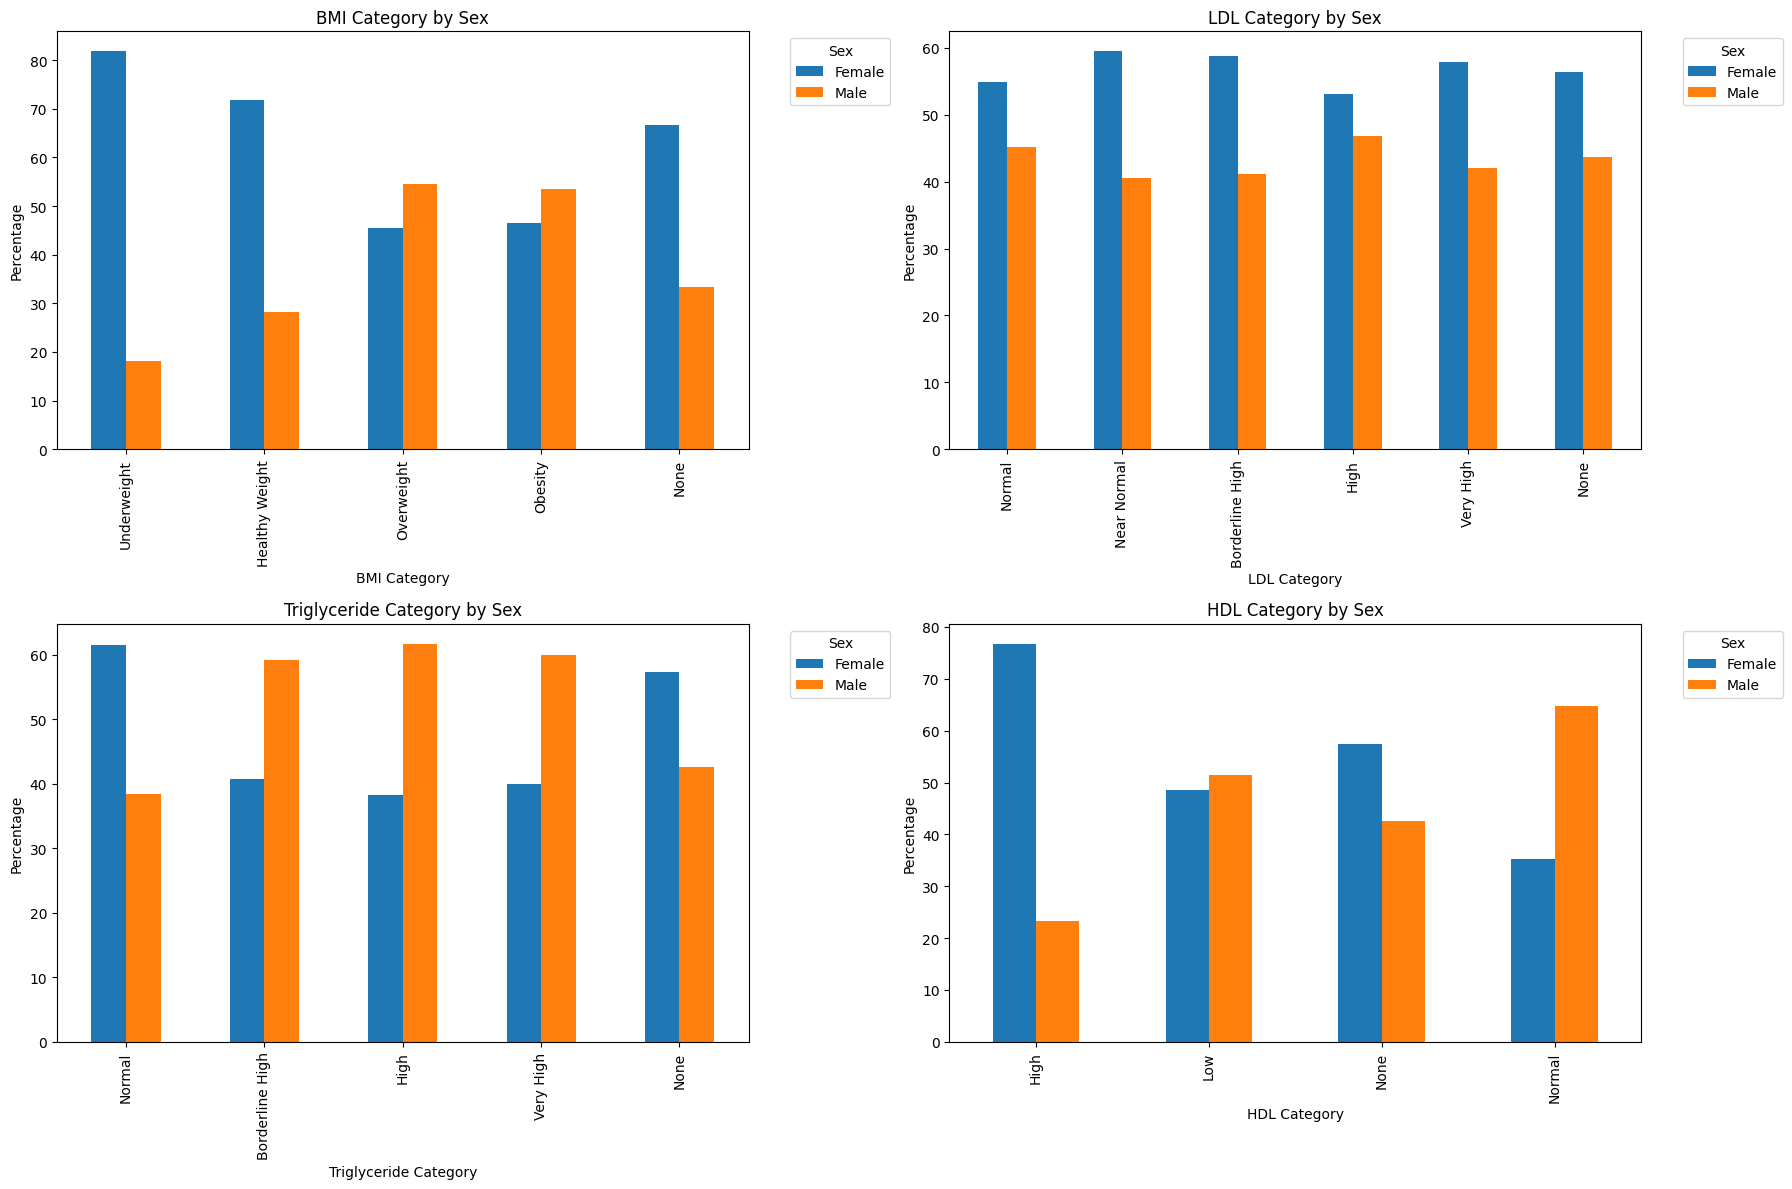

In [ ]:
def plot_percentage(ax, data, x, hue):
    # Filter out any unexpected values
    valid_categories = [cat for cat in data[x].unique() if cat is not None]
    data = data[data[x].isin(valid_categories)]
    # Calculate total counts
    total_counts = data.groupby([x, hue]).size().unstack()
    # Calculate percentages
    percentage = total_counts.div(total_counts.sum(axis=1), axis=0) * 100
    percentage.plot(kind='bar', stacked=False, ax=ax)

    # Set labels and title
    ax.set_xlabel(x)
    ax.set_ylabel('Percentage')
    ax.set_title(f'{x} by {hue}')
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.figure(figsize=(18, 12))

# BMI Category Plot
plt.subplot(2, 2, 1)
plot_percentage(plt.gca(), ClinicalCat, "BMI Category", "Sex")

# LDL Category Plot
plt.subplot(2, 2, 2)
plot_percentage(plt.gca(), ClinicalCat, "LDL Category", "Sex")

# Triglyceride Category Plot
plt.subplot(2, 2, 3)
plot_percentage(plt.gca(), ClinicalCat, "Triglyceride Category", "Sex")

# HDL Category Plot
plt.subplot(2, 2, 4)
plot_percentage(plt.gca(), ClinicalCat, "HDL Category", "Sex")

plt.tight_layout()
plt.show()

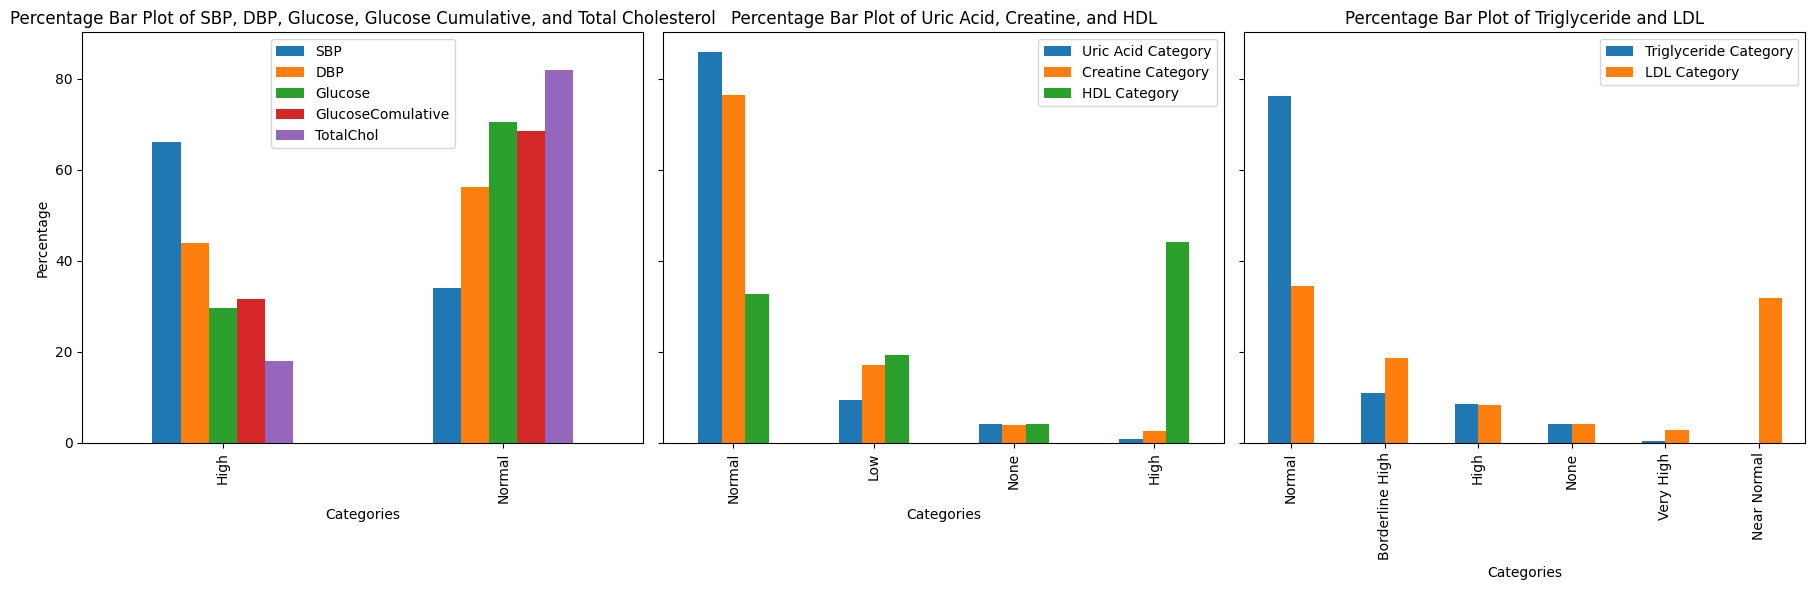

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Function to convert counts to percentages
def plot_percentage_bar(df, columns, ax, title):
    # Count occurrences and normalize to percentages
    value_counts = pd.concat([df[col].value_counts(normalize=True) * 100 for col in columns], axis=1).fillna(0)
    value_counts.columns = columns
    value_counts.plot(kind='bar', stacked=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Percentage')

# First plot: SBP, DBP, Glucose, GlucoseComulative, TotalChol
cat_vars1 = ['SBP', 'DBP', 'Glucose', 'GlucoseComulative', 'TotalChol']
plot_percentage_bar(ClinicalCat, cat_vars1, axes[0], 'Percentage Bar Plot of SBP, DBP, Glucose, Glucose Cumulative, and Total Cholesterol')

# Second plot: Uric Acid, Creatine, HDL
cat_vars2 = ['Uric Acid Category', 'Creatine Category', 'HDL Category']
plot_percentage_bar(ClinicalCat, cat_vars2, axes[1], 'Percentage Bar Plot of Uric Acid, Creatine, and HDL')

# Third plot: Triglyceride and LDL
cat_vars3 = ['Triglyceride Category', 'LDL Category']
plot_percentage_bar(ClinicalCat, cat_vars3, axes[2], 'Percentage Bar Plot of Triglyceride and LDL')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
print(ClinicalCat[["SBP", "DBP", "Glucose", "GlucoseComulative", "TotalChol"]].apply(lambda x : x.value_counts()).fillna(0), "\n\n")
print(ClinicalCat[["BMI Category"]].value_counts().fillna(0), "\n\n")
print(ClinicalCat[["Uric Acid Category", "Creatine Category", "HDL Category"]].apply(lambda x : x.value_counts()).fillna(0), "\n\n")
print(ClinicalCat[["Triglyceride Category", "LDL Category"]].apply(lambda x : x.value_counts()).fillna(0))

        SBP  DBP  Glucose  GlucoseComulative  TotalChol
High    888  591      397                424        243
Normal  458  755      949                922       1103 


BMI Category  
Healthy Weight    524
Overweight        487
Obesity           284
Underweight        33
None               18
Name: count, dtype: int64 


        Uric Acid Category  Creatine Category  HDL Category
High                    11                 34           594
Low                    125                231           259
None                    54                 53            54
Normal                1156               1028           439 


                 Triglyceride Category  LDL Category
Borderline High                  147.0           250
High                             115.0           111
Near Normal                        0.0           427
None                              54.0            55
Normal                          1025.0           465
Very High                          5.0            38


In [ ]:
# Diseases
Diseases = df.iloc[:,31:44]
Diseases.drop(columns=["Παρακαλώ προσδιορίστε τον καρκίνο"]).apply(lambda x : x.value_counts()).fillna(0)
#Diseases.columns

,Hypertension,Asthma,Myocardial infarction (heart attack) or chronic effects of an old heart attack,"Stroke (bleeding in the brain, clot in the brain) or chronic effects of an old stroke",Rheumatoid arthritis,Osteoarthritis,Osteoporosis,Diabetes melitus type 2,Kidney diseases,"Cancer (malignancy, leukemia, lymphoma) If yes, please specify e.g. breast, neck, lung, etc",Depression,Alzheimers
No,1110,1273.0,1323,1327.0,1314,1308.0,1243,1257.0,1309,1315.0,1316,1333.0
Yes,228,64.0,14,12.0,23,30.0,91,80.0,30,23.0,22,0.0
Δεν γνωρίζω - Δεν είμαι σίγουρος/η,1,0.0,1,0.0,1,0.0,3,0.0,1,0.0,1,0.0


In [ ]:
Diseases = df[['Sex']].join(Diseases)

In [ ]:
# Define columns and groups
columns = ['Hypertension', 'Asthma', 'Myocardial infarction (heart attack) or chronic effects of an old heart attack',
       'Stroke (bleeding in the brain, clot in the brain) or chronic effects of an old stroke',
       'Rheumatoid arthritis', 'Osteoarthritis', 'Osteoporosis',
       'Diabetes melitus type 2', 'Kidney diseases',
       'Depression', 'Alzheimers']

categorical = ['Hypertension', 'Asthma', 'Myocardial infarction (heart attack) or chronic effects of an old heart attack',
       'Stroke (bleeding in the brain, clot in the brain) or chronic effects of an old stroke',
       'Rheumatoid arthritis', 'Osteoarthritis', 'Osteoporosis',
       'Diabetes melitus type 2', 'Kidney diseases',
       'Depression', 'Alzheimers']
groupby = 'Sex'

# Create Table One
table = TableOne(data=Diseases, columns=columns, categorical=categorical, groupby=groupby, pval=True)
# Print Table One
print(table.tabulate(tablefmt="github"))

|                                                                                              |                                    | Missing   | Overall     | Female     | Male       | P-Value   |
|----------------------------------------------------------------------------------------------|------------------------------------|-----------|-------------|------------|------------|-----------|
| n                                                                                            |                                    |           | 1346        | 768        | 578        |           |
| Hypertension, n (%)                                                                          | No                                 |           | 1110 (82.5) | 666 (86.7) | 444 (76.8) | <0.001    |
|                                                                                              | None                               |           | 7 (0.5)     | 4 (0.5)    | 3 (0.5)    |           |
|         

In [ ]:
# Define columns and groups
Diseases = demographics[['Age Group']].join(Diseases)
columns = ['Hypertension', 'Asthma', 'Myocardial infarction (heart attack) or chronic effects of an old heart attack',
       'Stroke (bleeding in the brain, clot in the brain) or chronic effects of an old stroke',
       'Rheumatoid arthritis', 'Osteoarthritis', 'Osteoporosis',
       'Diabetes melitus type 2', 'Kidney diseases',
       'Depression', 'Alzheimers']

categorical = ['Hypertension', 'Asthma', 'Myocardial infarction (heart attack) or chronic effects of an old heart attack',
       'Stroke (bleeding in the brain, clot in the brain) or chronic effects of an old stroke',
       'Rheumatoid arthritis', 'Osteoarthritis', 'Osteoporosis',
       'Diabetes melitus type 2', 'Kidney diseases',
       'Depression', 'Alzheimers']
groupby = 'Age Group'

# Create Table One
table = TableOne(data=Diseases, columns=columns, categorical=categorical, groupby=groupby, pval=True)
# Print Table One
print(table.tabulate(tablefmt="github"))

|                                                                                              |                                    | Missing   | Overall     | (20, 40]   | (40, 60]   | (60, 80]   | (80, 100]   | P-Value   |
|----------------------------------------------------------------------------------------------|------------------------------------|-----------|-------------|------------|------------|------------|-------------|-----------|
| n                                                                                            |                                    |           | 1346        | 334        | 637        | 357        | 14          |           |
| Hypertension, n (%)                                                                          | No                                 |           | 1110 (82.5) | 330 (98.8) | 559 (87.8) | 208 (58.3) | 9 (64.3)    | <0.001    |
|                                                                                              | Non

In [ ]:
# Calculate the prevalence of each disease
Diseases = Diseases.drop(columns = ["Age Group"])
disease_prevalence = Diseases.apply(lambda x: x.str.lower() == 'yes').sum()

# Convert to percentage
disease_prevalence_percentage = (disease_prevalence / len(Diseases)) * 100

# Display disease prevalence
print(disease_prevalence_percentage.sort_values(ascending=False).apply(lambda x: f"{x:.2f}%"))

Hypertension                                                                                   16.94%
Osteoporosis                                                                                    6.76%
Diabetes melitus type 2                                                                         5.94%
Asthma                                                                                          4.75%
Osteoarthritis                                                                                  2.23%
Kidney diseases                                                                                 2.23%
Rheumatoid arthritis                                                                            1.71%
Cancer (malignancy, leukemia, lymphoma) If yes, please specify e.g. breast, neck, lung, etc     1.71%
Depression                                                                                      1.63%
Myocardial infarction (heart attack) or chronic effects of an old heart attack    

In [ ]:
#Medications
Drugs = df.iloc[:, 45:53]

In [ ]:
# Combine all drug entries from the columns, dropping NaN values
all_drugs = pd.concat([Drugs[col].dropna() for col in Drugs], ignore_index=True)

# Count the occurrences of each drug
drug_usage_counts = all_drugs.value_counts()

# Display the top 10 most frequently used drugs
top_10_drugs = drug_usage_counts.head(9)

# Print the top 10 drugs and their counts
top_10_drugs.to_excel('new.xlsx')
print(top_10_drugs)

Thyroxine               102
Folic acid               83
Metformin                66
Aspirin                  61
Calcium                  57
Rosuvastatin             45
Vitamin D supplement     44
Atorvastatin             43
Deferiprone              43
Name: count, dtype: int64


In [ ]:
# Convert the top 10 drugs to an array (or list)
top_10_drugs_array = top_10_drugs.index.tolist()

# Array of treatments corresponding to the drugs in the same order as `top_10_drugs_array`
treatments = [
    'Goiter or hypothyroidism',
    'Anemia',
    'Diabetes',
    'pain, fever, inflammation, migraines, cardiovascular events',
    'Calcium deficiency',
    'Atherosclerosis, Cardiovascular events, dyslipidemias, Hypertension, Dysbetalipoproteinemia',
    'Vitamin D deficiency',
    'High Cholesterol, Cardiovascular events, angina, stroke',
    'Transfusional iron overload'
]

# Ensure the number of treatments matches the number of drugs
if len(treatments) != len(top_10_drugs_array):
    raise ValueError("The length of the treatments list does not match the length of the top 10 drugs array.")

# Print the drug and its corresponding treatment
for drug, treatment in zip(top_10_drugs_array, treatments):
    print(f'{drug}: is used to treat {treatment}')

Thyroxine: is used to treat Goiter or hypothyroidism
Folic acid: is used to treat Anemia
Metformin: is used to treat Diabetes
Aspirin: is used to treat pain, fever, inflammation, migraines, cardiovascular events
Calcium: is used to treat Calcium deficiency
Rosuvastatin: is used to treat Atherosclerosis, Cardiovascular events, dyslipidemias, Hypertension, Dysbetalipoproteinemia
Vitamin D supplement: is used to treat Vitamin D deficiency
Atorvastatin: is used to treat High Cholesterol, Cardiovascular events, angina, stroke
Deferiprone: is used to treat Transfusional iron overload


In [ ]:
#Chi Square test for Demographics

def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print(f"Reject the null hypothesis - there is a significant association between '{col1}' and '{col2}'\n")
    else:
        print(f"Fail to reject the null hypothesis - no significant association between '{col1}' and '{col2}'\n")

# List of categorical columns to test
categorical_columns = demographics.select_dtypes(include=['object']).columns

# Perform chi-square test on pairs of categorical columns
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        chi_square_test(demographics, categorical_columns[i], categorical_columns[j])


Chi-Square Test between Sex and Family status:
Chi2 Statistic: 12.026533353172074
P-value: 0.017155043247000783
Reject the null hypothesis - there is a significant association between 'Sex' and 'Family status'

Chi-Square Test between Sex and Education level:
Chi2 Statistic: 56.21482460800255
P-value: 2.561743556115248e-09
Reject the null hypothesis - there is a significant association between 'Sex' and 'Education level'

Chi-Square Test between Sex and Smoking:
Chi2 Statistic: 57.47704320355982
P-value: 2.0327028553735042e-12
Reject the null hypothesis - there is a significant association between 'Sex' and 'Smoking'

Chi-Square Test between Sex and Smoking Times:
Chi2 Statistic: 92.17187791331251
P-value: 2.3491168471836117e-18
Reject the null hypothesis - there is a significant association between 'Sex' and 'Smoking Times'

Chi-Square Test between Sex and Ever was diagnosed with a medical condition:
Chi2 Statistic: 1.9181597406321118
P-value: 0.3832453592209487
Fail to reject the nul

In [ ]:
#Chi Square test for Clinical Tests
pd.Series(ClinicalCat.columns)
# List of categorical columns to test
categorical_columns = ClinicalCat.columns

# Perform chi-square test on pairs of categorical columns
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        chi_square_test(ClinicalCat, categorical_columns[i], categorical_columns[j])

Chi-Square Test between Age Group and Sex:
Chi2 Statistic: 3.0764448046026716
P-value: 0.37998840819685525
Fail to reject the null hypothesis - no significant association between 'Age Group' and 'Sex'

Chi-Square Test between Age Group and SBP:
Chi2 Statistic: 75.32657506629722
P-value: 3.0839765138646275e-16
Reject the null hypothesis - there is a significant association between 'Age Group' and 'SBP'

Chi-Square Test between Age Group and DBP:
Chi2 Statistic: 24.934381407699036
P-value: 1.5936043322469928e-05
Reject the null hypothesis - there is a significant association between 'Age Group' and 'DBP'

Chi-Square Test between Age Group and BMI Category:
Chi2 Statistic: 79.38501698575622
P-value: 5.406346479805373e-12
Reject the null hypothesis - there is a significant association between 'Age Group' and 'BMI Category'

Chi-Square Test between Age Group and Glucose:
Chi2 Statistic: 65.90592168098965
P-value: 3.210399055649039e-14
Reject the null hypothesis - there is a significant asso